In [1]:
#importing librairies
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as pyplot 
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import style

In [2]:
#using panda to find atrributes 
data = pd.read_csv("forestfires.csv", sep=",")
print(data.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [3]:
# Print the columns to check their names
print(data.columns)

# Select columns if they exist
columns_to_select = ["X", "Y" "month", "FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "rain", "area"]
existing_columns = [col for col in columns_to_select if col in data.columns]
if not existing_columns:
    print("None of the specified columns exist in the DataFrame.")
else:
    data = data[existing_columns]
    print(data.head())

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')
   X  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [4]:
predict = "temp"
x = np.array(data.drop(predict, axis=1))
y = np.array(data[predict])

In [5]:
#split into train and test
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.5)

In [6]:
linear = linear_model.LinearRegression()

linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(acc)

0.555611880401703


In [7]:
#Save the Model with pickle 

 
 
with open("tempmodel.pickle", "wb") as f: 

    pickle.dump(linear, f) 

 

# Load the pickle file 

pickle_in = open("tempmodel.pickle", "rb") 

linear = pickle.load(pickle_in) 

 

print('Coefficient: \n', linear.coef_) 

print('Intercept: \n', linear.intercept_) 

 

predictions = linear.predict(x_test) 

 

for x in range(len(predictions)): 

    print(predictions[x], x_test[x], y_test[x]) 

Coefficient: 
 [ 1.72263627e-01 -2.22480420e-02  2.54944856e-02  6.16850928e-03
  2.07659692e-01 -1.80331835e-01 -5.10833619e-01  4.49943691e+00
  1.86626262e-03]
Intercept: 
 21.98877576992957
22.59755552862905 [  4.    92.4   96.2  739.4    8.6   24.     4.9    0.     3.78] 19.2
22.130750798884122 [  4.   92.4  96.2 739.4   8.6  24.    5.8   0.    0. ] 18.6
18.778554404559387 [  6.    91.2   94.3  744.4    8.4   47.     4.9    0.    12.64] 16.8
13.480950052409042 [  6.   84.9  27.5 353.5   3.4  51.    4.    0.    0. ] 4.2
20.054018212660395 [  8.   89.4 253.6 768.4   9.7  73.    2.7   0.    0. ] 14.2
21.295361777592394 [  1.   91.  121.2 561.6   7.   19.    6.7   0.    0. ] 21.6
22.368404729215786 [  6.    92.5  122.   789.7   10.2   42.     2.2    0.     1.09] 18.4
15.366511777776548 [ 4.  87.2 23.9 64.7  4.1 35.   1.8  0.   0. ] 11.8
21.55461963265487 [  4.    93.5   85.3  395.     9.9   28.     1.3    0.     1.76] 27.2
20.088238418810867 [  6.   91.7  75.6 718.3   7.8  39.    3.6 

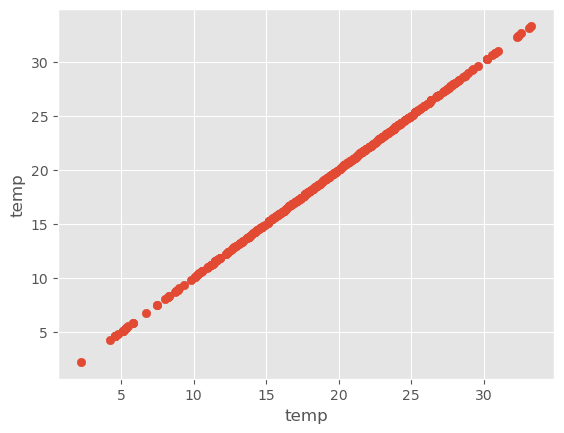

In [8]:
#PLOT THE DATA 

 

style.use("ggplot") 

 

# Set up a scatter plot 

p = "temp" 

pyplot.scatter(data[p], data["temp"]) 

pyplot.xlabel(p) 

pyplot.ylabel("temp") 

pyplot.show() 